In [8]:
library(imputeTS)
library(astsa)
library(stats)

#### Ploting a white noise

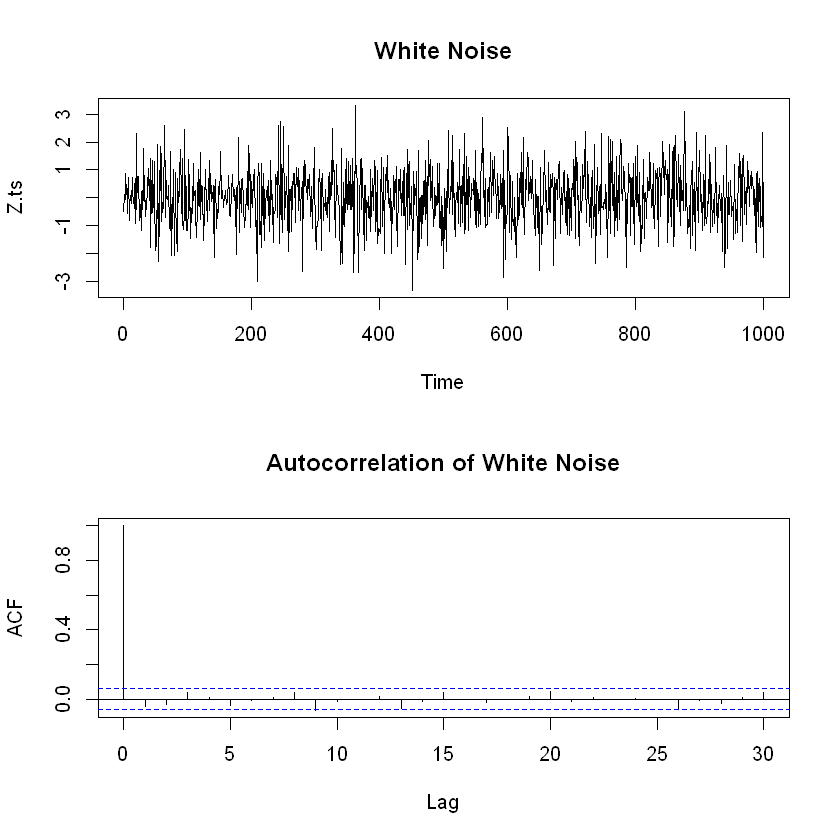

In [128]:
set.seed(100)
N=1000
Z=rnorm(N, 0, 1)
Z.ts = ts(Z)
par(mfrow=c(2,1))
plot(Z.ts, main='White Noise')
X.acf = acf(Z.ts, main='Autocorrelation of White Noise')

#### Simualting a Random Walk 

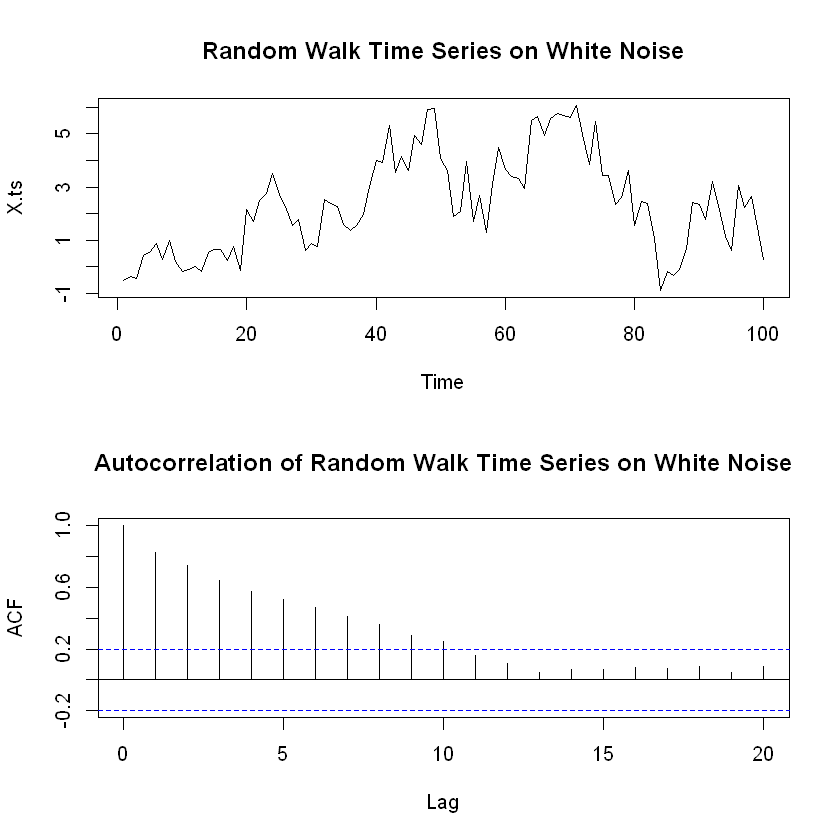

In [126]:
set.seed(100)
N=100
Z=rnorm(N, 0, 1)
X=NULL
X[1]=Z[1]
for (t in 2:N){
    X[t] = X[t-1] + Z[t]
}
X.ts = ts(X)
par(mfrow=c(2,1))
plot(X.ts, main='Random Walk Time Series on White Noise')
X.acf = acf(X.ts, main='Autocorrelation of Random Walk Time Series on White Noise')

### Simulating Moving Average (MA) processes

#### Simulating a MA(1) process (Xt = beta0*Zt + beta1 * Zt-1)

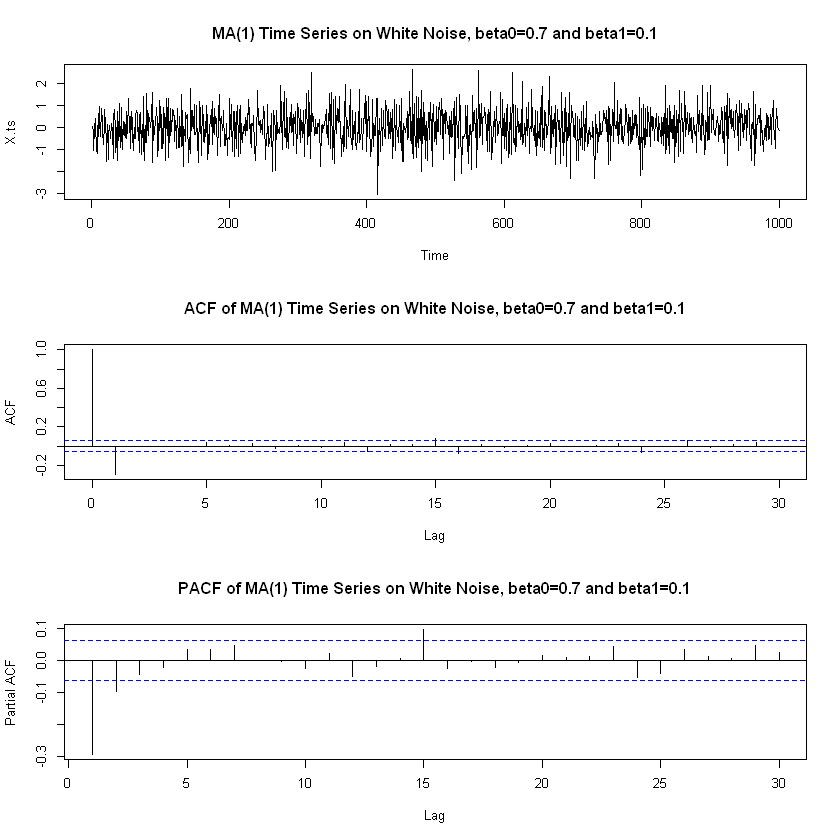

In [134]:
set.seed(10)
N=1000
beta0=0.8
beta1=-0.3
Z=rnorm(N, 0, 1)
X=NULL
X[1]=beta0*Z[1]
for (t in 2:N){
    X[t] = beta0*Z[t] + beta1*Z[t-1]
}
X.ts = ts(X)
par(mfrow=c(3,1))
plot(X.ts, main='MA(1) Time Series on White Noise, beta0=0.7 and beta1=0.1')
X.acf = acf(X.ts, main='ACF of MA(1) Time Series on White Noise, beta0=0.7 and beta1=0.1')
X.pacf = pacf (lag = 30, X.ts, pl = TRUE, main='PACF of MA(1) Time Series on White Noise, beta0=0.7 and beta1=0.1')

#### Simulating a MA(1) using the 'stats' library

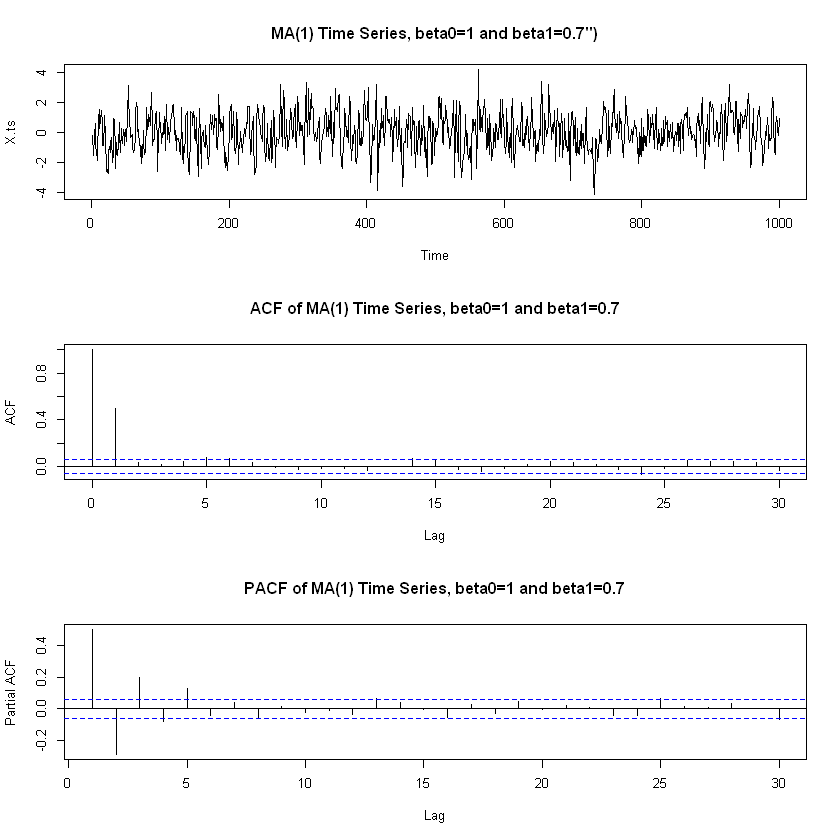

In [136]:
set.seed(10)
beta0=1
beta1=0.7
X.ts <- arima.sim(list(ma=beta1), n=1000)
par(mfrow=c(3,1))
plot(X.ts, main='MA(1) Time Series, beta0=1 and beta1=0.7")')
X.acf = acf(X.ts, main='ACF of MA(1) Time Series, beta0=1 and beta1=0.7')
pacf(X.ts, lag=30, main='PACF of MA(1) Time Series, beta0=1 and beta1=0.7')

#### Let's see how the parameters in MA(q=2) process affect the autocorrelation function

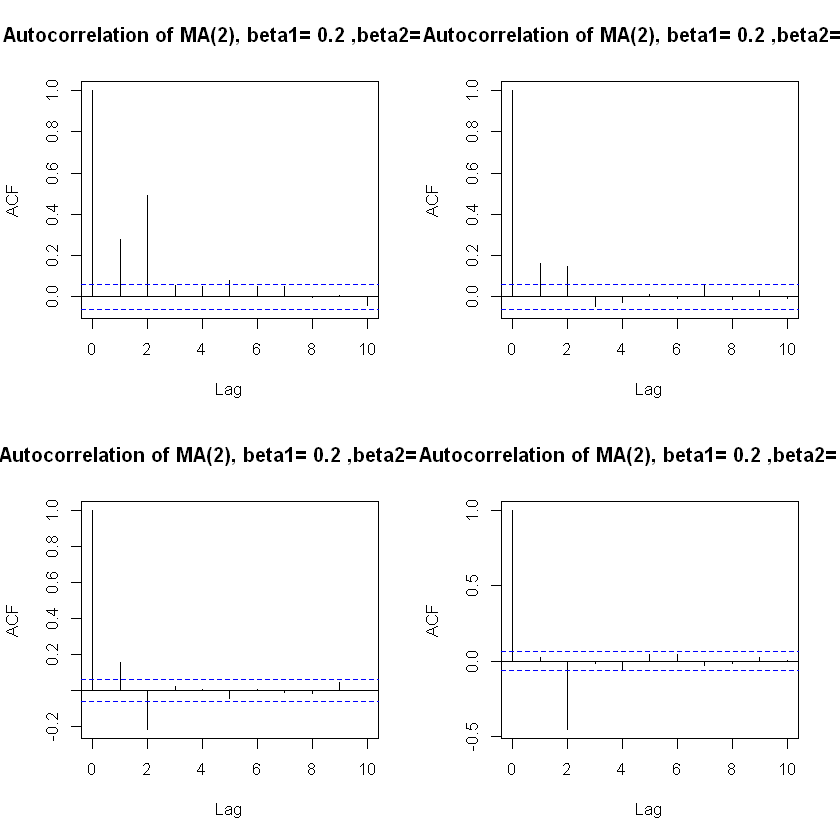

In [109]:
set.seed(10)
beta0=1.0

beta1=0.8
X1.ts <- arima.sim(list(ma=c(0.2, beta1)), n=1000)
beta2=0.2
X2.ts <- arima.sim(list(ma=c(0.2, beta2)), n=1000)
beta3=-0.3
X3.ts <- arima.sim(list(ma=c(0.2, beta3)), n=1000)
beta4=-0.8
X4.ts <- arima.sim(list(ma=c(0.2, beta4)), n=1000)
par(mfrow=c(2,2))
acf(X1.ts, lag.max=10, main=paste('Autocorrelation of MA(2), beta1=', 0.2, ',beta2=', beta1))
acf(X2.ts, lag.max=10, main=paste('Autocorrelation of MA(2), beta1=', 0.2, ',beta2=', beta2))
acf(X3.ts, lag.max=10, main=paste('Autocorrelation of MA(2), beta1=', 0.2, ',beta2=', beta3))
acf(X4.ts, lag.max=10, main=paste('Autocorrelation of MA(2), beta1=', 0.2, ',beta2=', beta4))

### Simulating Autoregressive (AR) processes

#### Simulating an AR(1) process (Xt = Zt + phi1 * Xt-1)

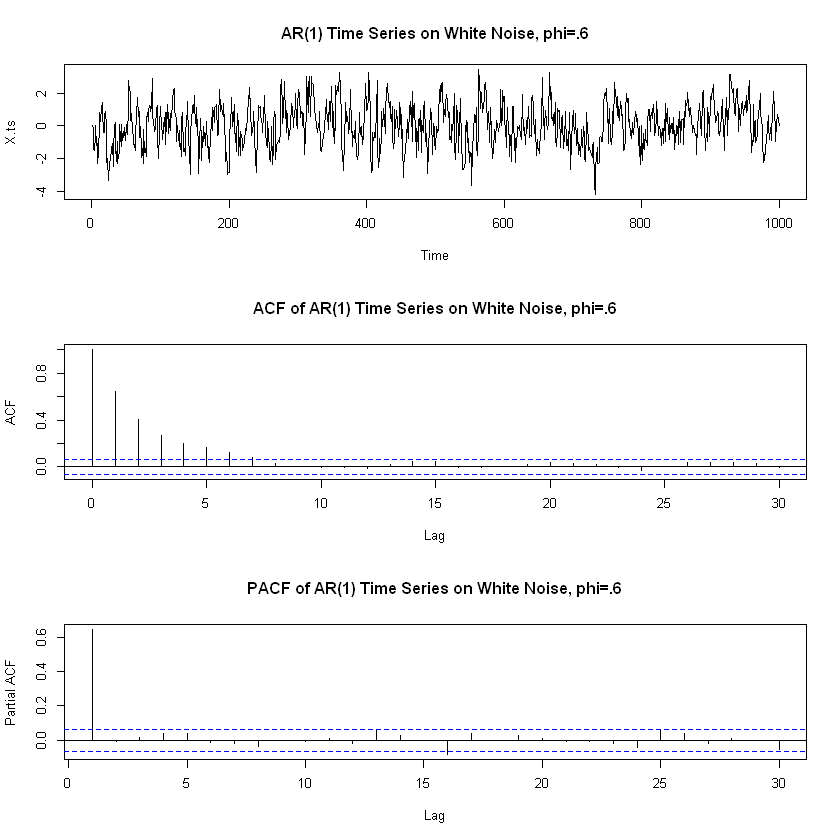

In [138]:
set.seed(10)
N=1000
phi=0.6
Z=rnorm(N, 0, 1)
X=NULL
X[1]=Z[1]
for (t in 2:N){
    X[t] = Z[t] + phi * X[t-1]
}
X.ts = ts(X)
par(mfrow=c(3,1))
plot(X.ts, main='AR(1) Time Series on White Noise, phi=.6')
X.acf = acf(X.ts, main='ACF of AR(1) Time Series on White Noise, phi=.6')
pacf(X.ts, lag=30, main='PACF of AR(1) Time Series on White Noise, phi=.6')

#### Simulating an AR(2) process using the 'stats' library

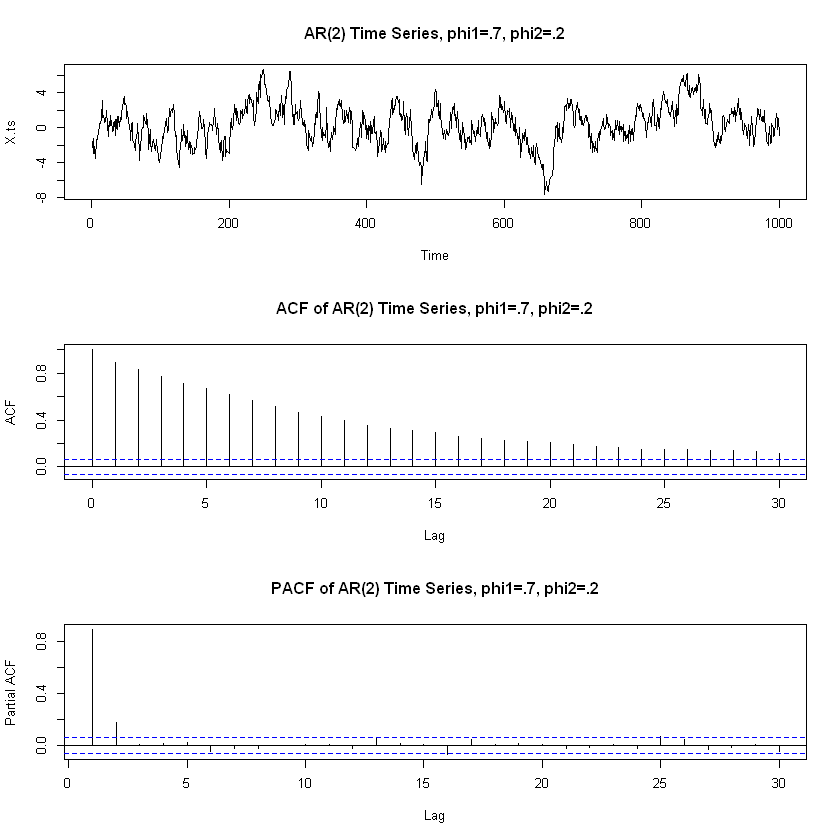

In [140]:
set.seed(10)
X.ts <- arima.sim(list(ar=c(0.7, 0.2)), n=1000)
par(mfrow=c(3,1))
plot(X.ts, main='AR(2) Time Series, phi1=.7, phi2=.2')
X.acf = acf(X.ts, main='ACF of AR(2) Time Series, phi1=.7, phi2=.2')
pacf(X.ts, lag=30, main='PACF of AR(2) Time Series, phi1=.7, phi2=.2')

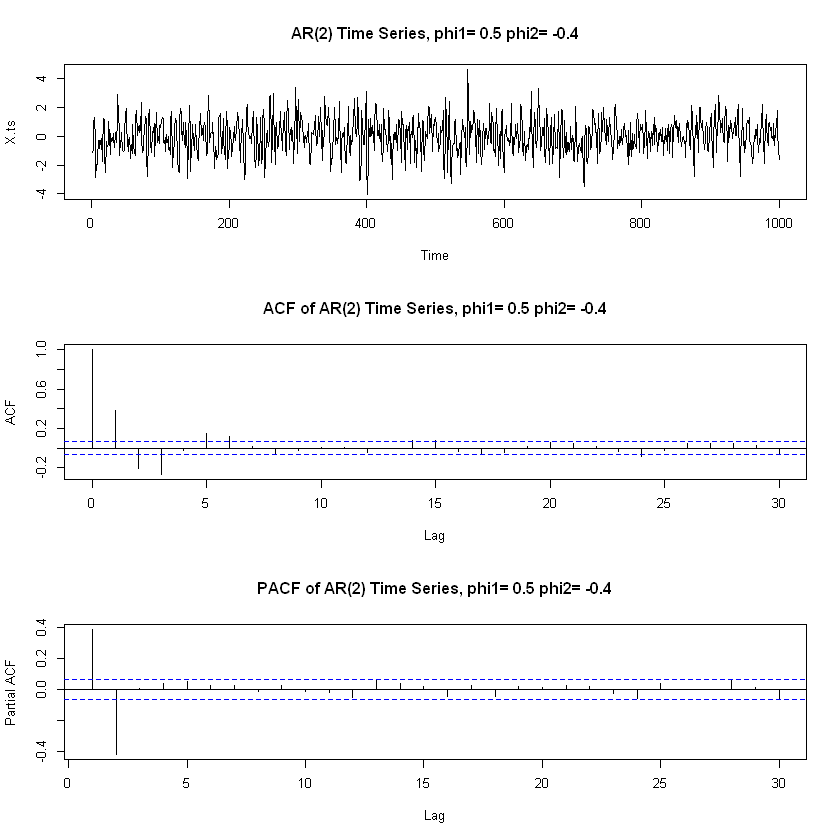

In [141]:
# Trying out with a negative coefficient
set.seed(10)
phi1=0.5
phi2=-0.4
X.ts <- arima.sim(list(ar=c(phi1, phi2)), n=1000)
par(mfrow=c(3,1))
plot(X.ts, main=paste('AR(2) Time Series, phi1=' ,phi1, 'phi2=', phi2))
X.acf = acf(X.ts, lag.max=NULL, main=paste('ACF of AR(2) Time Series, phi1=' ,phi1, 'phi2=', phi2))
pacf(X.ts, lag=30, main=paste('PACF of AR(2) Time Series, phi1=' ,phi1, 'phi2=', phi2))

#### Let’s see how the parameter in a AR(p=1) process affects the autocorrelation function.

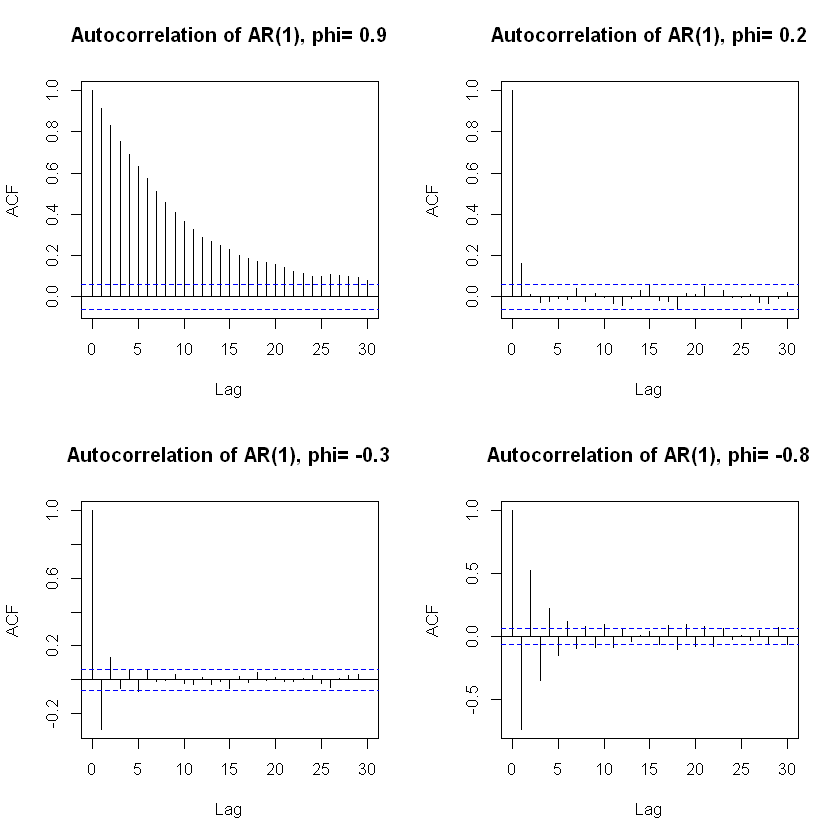

In [71]:
set.seed(10)
phi1=0.9
X1.ts <- arima.sim(list(ar=phi1), n=1000)
phi2=0.2
X2.ts <- arima.sim(list(ar=phi2), n=1000)
phi3=-0.3
X3.ts <- arima.sim(list(ar=phi3), n=1000)
phi4=-0.8
X4.ts <- arima.sim(list(ar=phi4), n=1000)
par(mfrow=c(2,2))
acf(X1.ts, lag.max=30, main=paste('Autocorrelation of AR(1), phi=', phi1))
acf(X2.ts, lag.max=30, main=paste('Autocorrelation of AR(1), phi=', phi2))
acf(X3.ts, lag.max=30, main=paste('Autocorrelation of AR(1), phi=', phi3))
acf(X4.ts, lag.max=30, main=paste('Autocorrelation of AR(1), phi=', phi4))